# Libraries

In [17]:
from sklearn import datasets                        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Functions

In [29]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    # Feature mapping
    X_poly = mapFeature(U, V, degree)
    X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
    Z = X_poly.dot(theta)

    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['class 1', 'class 0', 'Decision Boundary'])
    return cs

# Variables and dataset

In [30]:
data = pd.read_csv('data.txt',header=None)
data = data.to_numpy()
m = data.shape[0]
x1 = data[:,0].reshape((m, 1))
x2 = data[:,1].reshape((m, 1))
y = data[:,2].reshape((m, 1))
x = np.hstack((x1,x2))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=0)
degree = 6

# Plot data

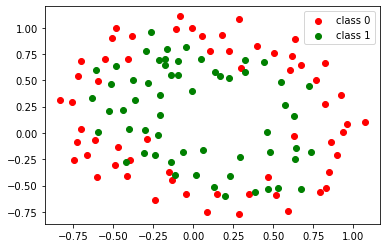

In [31]:
plt.scatter(x1[x1==x1-y],x2[x2==x2-y],c='r',label='class 0')
plt.scatter(x1[x1!=x1-y],x2[x2!=x2-y],c='g',label='class 1')
plt.legend()

# Model Training 

In [32]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
y_train = y_train.ravel()
X_train = mapFeature(X_train[:,0], X_train[:,1], degree)
logisticRegr.fit(X_train, y_train)
intercept = logisticRegr.intercept_
coefs = logisticRegr.coef_
optimum = np.vstack((intercept,coefs.reshape(X_train.shape[1],1)))

# Plot Decision boundary

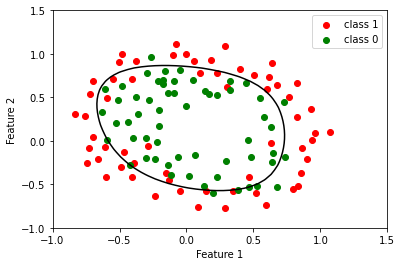

In [33]:
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(x1[x1==x1-y],x2[x2==x2-y],c='r',label='class 0')
plt.scatter(x1[x1!=x1-y],x2[x2!=x2-y],c='g',label='class 1')
plotDecisionBoundary(optimum, degree, axes)

In [35]:
X_test = mapFeature(X_test[:,0], X_test[:,1], degree)
R_test=logisticRegr.score(X_test,y_test)*100
print('Accuracy of your model is ',np.round(R_test),'%')

Accuracy of your model is  83.0 %
